In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [ ]:
!pip install transformers pandas scikit-learn numpy matplotlib seaborn pillow wordcloud

In [52]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, BertTokenizer, BertModel
import torch
import torch.nn as nn

In [ ]:
# downloaded from https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets/data
fake_data=pd.read_csv("./input/Fake.csv")
real_data=pd.read_csv("./input/True.csv")

In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
# remove (Reuters) because it would be an indicator for real news
real_data["text"] = real_data["text"].str.replace(r"\(Reuters\)", "", regex=True)

<Axes: ylabel='subject'>

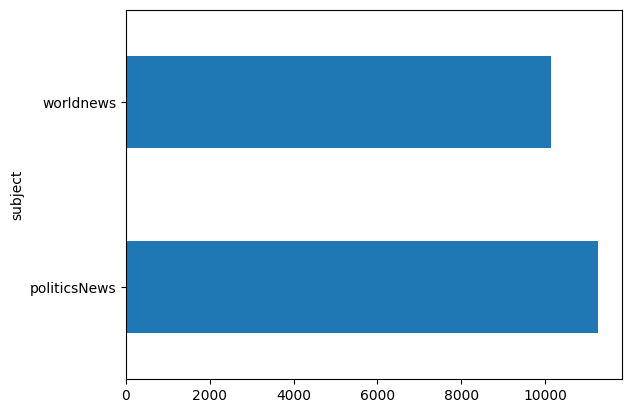

In [9]:
real_data['subject'].value_counts().plot(kind='barh')

<Axes: ylabel='subject'>

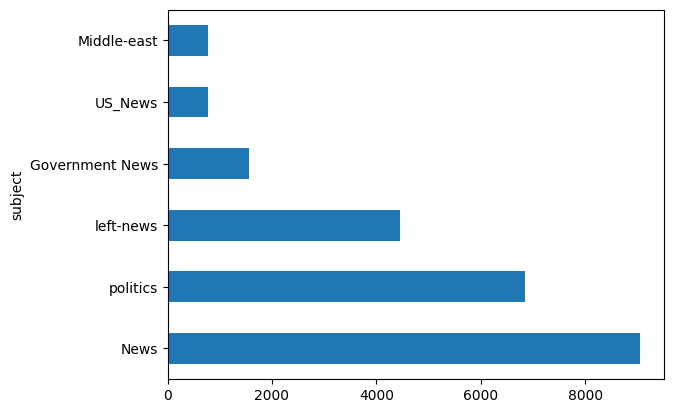

In [10]:
fake_data['subject'].value_counts().plot(kind='barh')

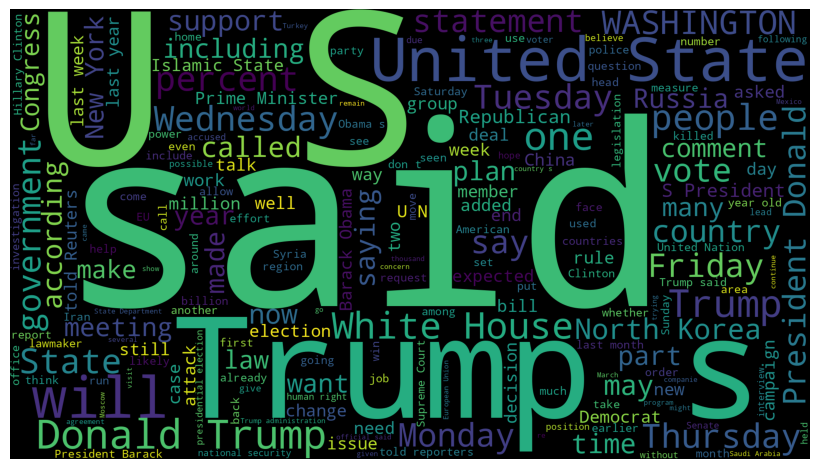

In [11]:
wordcld_text=" ".join(real_data["text"].tolist())
wordcloud=WordCloud(width=1920,height=1080).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

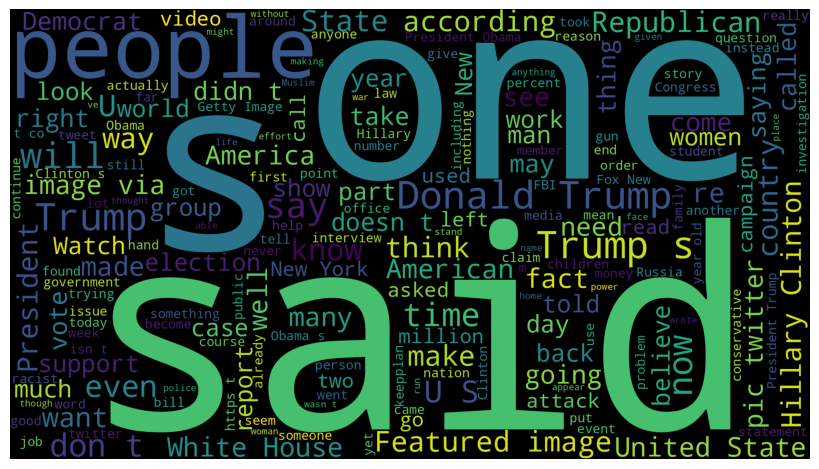

In [12]:
wordcld_text=" ".join(fake_data["text"].tolist())
wordcloud=WordCloud(width=1920,height=1080).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [13]:
fake_data["label"]="fake"
real_data["label"]="real"

In [18]:
final_data = pd.concat([fake_data,real_data]).reset_index(drop=True)
final_data.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [ ]:
# 631 times only headline available
final_data[final_data["text"].str.strip() == ""]

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",fake


In [ ]:
# no missing titles
final_data[final_data["title"].str.strip() == ""]

,title,text,subject,date,label


In [23]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

<Axes: ylabel='label'>

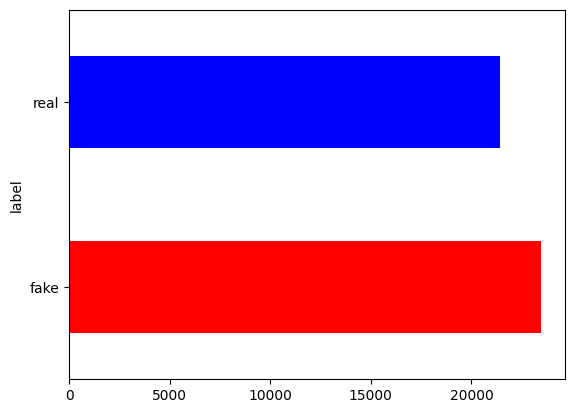

In [30]:
final_data.label.value_counts().plot(kind='barh', color=['red', 'blue'])

In [ ]:
final_data["text"]=final_data["title"] +": " + final_data["text"]
final_data=final_data[["text","label"]]
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})
final_data = final_data.sample(frac=1).reset_index(drop=True)
final_data.head()

,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [37]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]

In [45]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
bert_model = BertModel.from_pretrained('bert-base-cased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [53]:
maxlen=100
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'pt',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [50]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [51]:
X_train_token

{'input_ids': tensor([[  101,  8499,  7492,  ...,  1644,  1399,   102],
        [  101,  5169, 21728,  ...,   117,   156,   102],
        [  101, 21151, 10342,  ...,  1107,  1103,   102],
        ...,
        [  101, 22751,  9481,  ...,  1191,  1119,   102],
        [  101,   155, 15517,  ...,  4827,  1124,   102],
        [  101,  8499,   131,  ..., 11208,  1104,   102]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [54]:
class BertClassifier(nn.Module):
    def __init__(self, bert_model):
        super().__init__()
        self.bert = bert_model
        self.dropout1 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(bert_model.config.hidden_size, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        # Get BERT outputs
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        # Extract pooled output
        pooled_output = outputs.pooler_output  # You can also use outputs[1]
        
        # Classification layers
        x = self.dropout1(pooled_output)
        x = torch.tanh(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return self.sigmoid(x)

# Create classifier model
model = BertClassifier(bert_model)

# Print model architecture
print(model)

BertClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [58]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Assume 'model' is your PyTorch model already defined and moved to the device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [59]:
# ---------------------------
# Set Up Optimizer and Loss
# ---------------------------
optimizer = optim.Adam(model.parameters(), lr=1e-5, eps=1e-8, weight_decay=0.01)
criterion = nn.BCELoss()  # Use BCEWithLogitsLoss if your model does NOT include a final Sigmoid layer

# ---------------------------
# Learning Rate Scheduler
# ---------------------------
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True, min_lr=1e-6)

/home/martin/FakeNewsNLP/.venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [60]:
# ---------------------------
# Early Stopping Helper Class
# ---------------------------
class EarlyStopping:
    def __init__(self, patience=3, verbose=False, delta=0, restore_best_weights=True):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None
        self.restore_best_weights = restore_best_weights

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0

early_stopping = EarlyStopping(patience=3, verbose=True)

In [62]:
from torch.utils.data import Dataset, DataLoader
# Create a custom Dataset for pytorch
class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]["text"]
        label = self.data.iloc[index]["label"]
        # Tokenize the text
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )
        # Remove the extra batch dimension added by return_tensors='pt'
        input_ids = encoding["input_ids"].squeeze(0)
        attention_mask = encoding["attention_mask"].squeeze(0)

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Create the dataset
dataset = TextDataset(final_data, tokenizer, max_length=maxlen)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Example: Iterate through the DataLoader and print a batch
for batch in dataloader:
    print(batch)
    break



{'input_ids': tensor([[  101, 22751,  9481,  3048,   131, 12342, 11185, 18082,  2069,   147,
         23293,  2249, 26692,  1592, 11607,  4630,  1116,   157,  2107,  5301,
          3692, 18096,  1124,   787,   188,  3956,  1556,  4279,  6624, 12120,
          1116,  4894, 26426,  1158,  3458, 13654,   131,  1287, 20884,  1541,
          2144,   189,  1920,  1184,  8366, 13509,  2367,  1140,  1164,   117,
          1119,  1178, 16903,  1293,  1697,  8499,  5115,  1164,  1122,   117,
          1177,  1119,  1169,  1321,  1126, 10137,  2458,   119,  1409,  1697,
          8499, 10052,  1114,   170,  1934,  1137,  1741,  2486,   117, 20884,
         23423,  1116,  1114,  1122,   119,  1409,  8499, 23423,  1116,   117,
         20884,  6191,  1122,   188,   170,  1632,  1911,   119,  1109,   102],
        [  101,  8695,  1809,  1106,   158,   119,   151,   119,  2266,  3193,
           132,  2855,   117,   158,   119,   156,   119, 13143,   131,  7414,
         12150, 10069,   151, 13821, 

<span style="color: red;">UNTESTED:</span>

In [64]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(final_data, test_size=0.2, random_state=42)

# Create separate datasets for training and validation
train_dataset = TextDataset(train_df, tokenizer, max_length=maxlen)
val_dataset = TextDataset(val_df, tokenizer, max_length=maxlen)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [65]:

num_epochs = 20
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    # --- Training Loop ---
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device).float()  # shape: (batch_size,)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)  # Assume output shape is (batch_size, 1)
        outputs = outputs.squeeze(1)  # Convert to shape (batch_size,)

        loss = criterion(outputs, labels)
        loss.backward()
        
        # Gradient clipping (clip norm equivalent)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()

        running_loss += loss.item() * input_ids.size(0)
        preds = (outputs >= 0.5).float()  # binary prediction
        running_corrects += torch.sum(preds == labels)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # --- Validation Loop ---
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0
    val_total = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device).float()

            outputs = model(input_ids, attention_mask)
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * input_ids.size(0)
            preds = (outputs >= 0.5).float()
            val_running_corrects += torch.sum(preds == labels)
            val_total += labels.size(0)

    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_running_corrects.double() / val_total
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

    # Step the scheduler with validation loss
    scheduler.step(val_epoch_loss)

    # Early stopping check
    early_stopping(val_epoch_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        if early_stopping.restore_best_weights:
            model.load_state_dict(early_stopping.best_model_state)
        break

KeyboardInterrupt: 

In [ ]:
# ---------------------------
# Plot training history (accuracy)
# ---------------------------
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# ---------------------------
# Make Predictions on Test Set
# ---------------------------
# Assume test_loader yields batches similar to train/val loaders without labels.
model.eval()
all_probs = []
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask).squeeze(1)
        probs = outputs.cpu().numpy()
        preds = (outputs >= 0.5).cpu().numpy().astype(int)
        all_probs.extend(probs)
        all_preds.extend(preds)

all_preds = np.array(all_preds)
all_probs = np.array(all_probs)
